<a href="https://colab.research.google.com/github/duberii/pid-playground/blob/main/activities/Confusion_Matrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Confusion Matrices**
---
Welcome to Particle Identification Playground! In this activity, we will see how to evaluate different PID methods using confusion matrices!

**Before attempting this notebook, complete all of the activities in the Getting Started section and the Particle Identification Methods section. Also, be sure to complete the following notebooks from the Advanced Topics section before attempting this notebook:**
*   Working with Experimental Data

**After completing this notebook, you will be able to:**
*   Interpret confusion matrices
*   Create confusion matrices from estimator functions
*   Identify common trends in confusion matrices

In [ ]:
#@title Run this cell before starting
import numpy as np
import matplotlib.pyplot as plt
from google.colab import output
import math
import pandas as pd
output.enable_custom_widget_manager()
!pip install -qqq pidp_tools
from pidp_tools import *
!wget -q -O particle_data.hdf5 https://github.com/duberii/pid-playground/raw/main/data/particle_data.hdf5
particle_data = pd.read_hdf("particle_data.hdf5")
neutral_particles = particle_data.loc[particle_data['q']==0].copy().reset_index(drop=True)

---
##**PID Accuracy**
---
So far, we have explored a variety of particle identification methods that can be used to identify the particles that interact with our detectors. However, some PID methods are more powerful than others. In this section, we will explore how to compare PID methods.

To evaluate how powerful a PID method is, we want to calculate an **accuracy**, which we can calculate as follows: $$
\mbox{accuracy} = \frac{\left ( \mbox{number of particles correctly identified} \right )}{\left ( \mbox{ number of particles tested} \right )}
$$
For example, let's say we have a dataset with 2 muon events (2 different times a muon interacted with the detector). We would then apply our PID method to both of these muon events, and the PID method would tell us what kind of particle it thinks we detected. For example, the PID method might identify the first muon as a muon, but it might mistake the second muon as a pion. In this case, the PID method was only able to correctly identify one muon out of the two we tested, so our accuracy would be $1/2$ or $0.5$. This says that our PID method has a $50\%$ chance of correctly identifying a particle.

There is one big problem with this method- we need to know the identity of the particles we are testing to test the PID method, but we need a PID method to know the identity of the particles we are detecting! One way we can avoid this issue is to use simulation data to test our PID methods. This way, we can specifically tell the simulator to simulate what would happen when a pion (for example) interacts with the detector. This way, we know exactly what the true identity of the particle is. However, we need to keep in mind that simulation data is not exactly the same as experimental data, so this is only an estimate of the true accuracy of PID methods.

---
##**Confusion Matrices**
---
Even though accuracies can give us some good information about the power of a PID method, some particles are easier to identify than others. To take this into account, we create something called a **confusion matrix**. A confusion matrix is a compact way to store tons of information about a PID method, such as the accuracy for each particle type and which particles are commonly confused. For simplicity, let's start off with a small confusion matrix. Let's say we have a sample of neutral particles, and we want to see how well a neutral PID method works. A sample confusion matrix might look something like this:

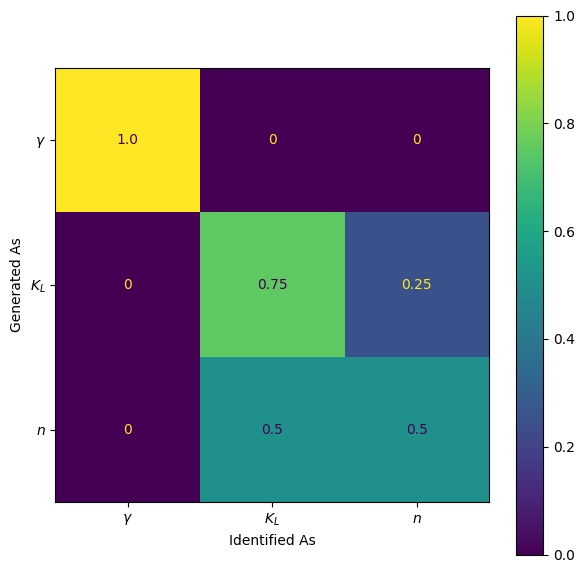

In [ ]:
# @title
class_names = ['Photon','KLong','Neutron']
generated_as = ['Photon','Photon','Photon','Photon','KLong','KLong','KLong','KLong','Neutron','Neutron','Neutron','Neutron']
identified_as = ['Photon','Photon','Photon','Photon','KLong','KLong','KLong','Neutron','Neutron','KLong','Neutron','KLong']
confusion_matrix = ConfusionMatrix(generated_as,identified_as)

Notice how the labels on the left are titled "Generated As". This means that the rows represent which particle was the particle we simulated. For example, the top row represents events where we simulated photons. The labels on the bottom are titled "Identified As", and this is where we store information about what our PID method identified the particles as.

For example, the top left box (which has a 1 in it) is in the "Photon" row, so this box refers to events that simulated photons. However, it is also in the "Photon" column, meaning this box represents the proportion of simulated photons that were correctly identified as photons by our PID method. The 1 in that box represents that 100% of particles generated as photons were correctly identified as photons by our PID method.

In general, the "main diagonal" (the squares that form the diagonal line from top left to bottom right) represent our particle-specific accuracies. As mentioned above, the top right value (in this case) represents the fraction of photons that were correctly identified as photons by our PID method. In this case, that number is 1, which means our PID method could perfectly identify photons as photons in the dataset we tested it on. If we look at the square in the center of the matrix, which is in the "Klong" row and the "Klong" column, we get the fraction of Klongs that were correctly identified as Klongs. In this case, it is only 0.75, so our PID method only correctly identified 75% of Klongs as Klongs.

How did it identify the other 25% of Klongs? To find this value, we want to look at the KLong row (which contains information about all of the particles generated as KLongs), and look for the remaining 25%. In this case, we find it in the "Neutrons" column, which tells us that 25% of Klongs were identified as neutrons. The numbers that are not in the "diagonal" are called "off-diagonal", and these values represent how often one particle type is confused for another.

**Note:** The diagonal elements of a confusion matrix only represent accuracies if the confusion matrix has the same particles on both axes. For many of the confusion matrices we weill work with, muons will be excluded from the "identified as" axis, since most PID methods aren't able to distinguish pions and muons. In general, you can always find accuracy values by finding the square of the confusion matrix that is in both the "generated as" row and the "identified as" column corresponding to the particle you're interested in.

####**Question #1:**
---
Pick a row of the above confusion matrix, and take a sum of all of the numbers in that row. What do you get? If you try this for a different row, do you get the same value? Why or why not?

Double click to edit this cell and answer the following questions: What do you get? If you try this for a different row, do you get the same value? Why or why not?

#####**Solution:**

Looking at the top row, we get $1+0+0=1$. Looking at the second row, we get $0 + 0.75 + 0.25=1$. Looking at the third row, we get $0 + 0.5 + 0.5$. No matter which row we look at, we always get the same number (1) when we add up all of the numbers in that row.

Why does this happen? Remember that all numbers in the same row represent a fraction of the number of events containing that particle. For example, all of the numbers in the first row represent a fraction of the total number of photon events. When we take the sum of all numbers in a row, we always get 1 since all photon events must be identified as **something**.

####**Question #2:**
---
Run the cell shown below. Based on the resulting confusion matrix, which particle is the "easiest" to identify using the PID method used to create the confusion matrix? In other words, which particle had the highest accuracy?

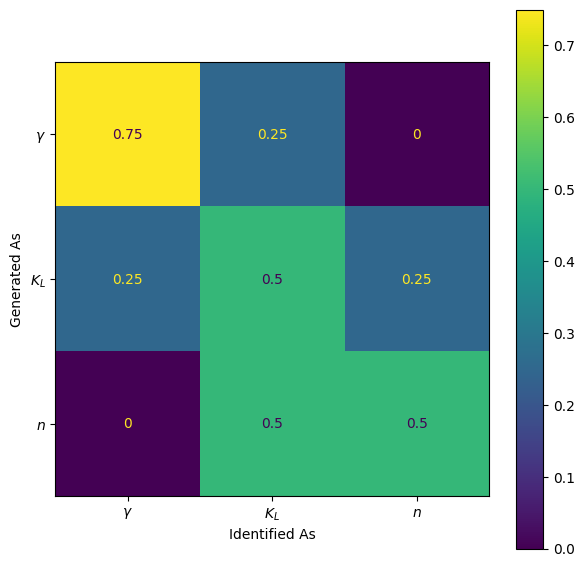

In [ ]:
# @title
class_names = ['Photon','KLong','Neutron']
generated_as = ['Photon','Photon','Photon','Photon','KLong','KLong','KLong','KLong','Neutron','Neutron','Neutron','Neutron']
identified_as = ['Photon','KLong','Photon','Photon','Photon','KLong','KLong','Neutron','Neutron','KLong','Neutron','KLong']
confusion_matrix = ConfusionMatrix(generated_as,identified_as)

Double click to edit this cell and answer the following question: Which particle is the "easiest" to identify using the PID method used to create the confusion matrix?

#####**Solution:**

We can find the accuracy of the PID method in identifying various particles by looking along the diagonal. In the top left, we have the accuracy for photons (because it is "Generated As" a photon column and "Identified As" a photon), which is 0.75. In the middle row and middle column, we have the KLong accuracy, which is 0.5. Finally, in the bottom left, we have the neutron accuracy, which is 0.5. Because the accuracy of the photon is the highest, we could say that this PID method has the easiest time identifying photons.

####**Question #3:**
---
Below, we have a full-sized confusion matrix with all 13 particles that are commonly seen in particle physics experiments. In this confusion matrix, how often is a positive pion ($\pi+$) misidentified as a positron ($\overline{e}$)?

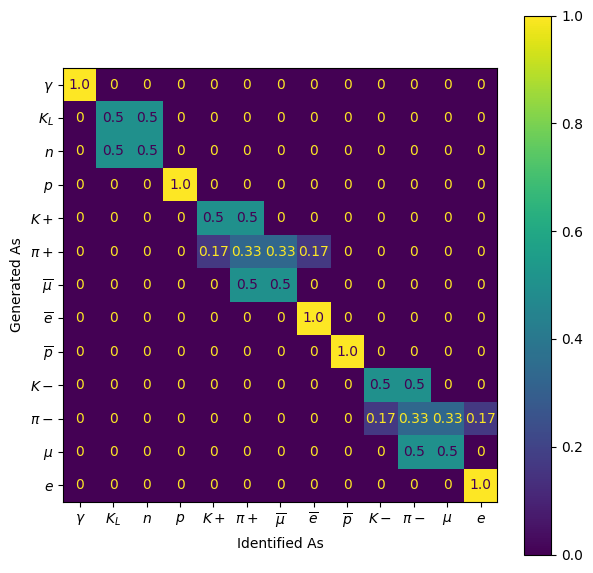

In [ ]:
# @title
generated_as = [["Photon","KLong","Neutron","Proton","K+","Pi+","AntiMuon","Positron","AntiProton","K-","Pi-","Muon","Electron","No ID"][i] for i in [0,1,1,2,2,3,4,4,5,5,5,5,5,5,6,6,7,8,9,9,10,10,10,10,10,10,11,11,12]]
identified_as = [["Photon","KLong","Neutron","Proton","K+","Pi+","AntiMuon","Positron","AntiProton","K-","Pi-","Muon","Electron","No ID"][i] for i in [0,1,2,2,1,3,4,5,5,5,4,6,6,7,5,6,7,8,9,10,9,10,10,11,11,12,10,11,12]]
confusion_matrix = ConfusionMatrix(generated_as,identified_as)

Double click to edit this cell and answer the following question: In this confusion matrix, how often is a positive pion ($\pi+$) misidentified as a positron ($\overline{e}$)?

#####**Solution:**

If we look at the $\pi+$ row, which contains information about the positive pion events, we see that the fraction of positive pions that are misidentified as positrons ($\overline{e}$) is 0.17, meaning there is about a $17\%$ chance that a positive pion would be identified as an electron using the PID method used to create this confusion matrix.

####**Question #4:**
---
Below, we have a full-sized confusion matrix with all 13 particles that are commonly seen in particle physics experiments. In this confusion matrix, what particle is the muon ($\mu$) most often misclassified as?

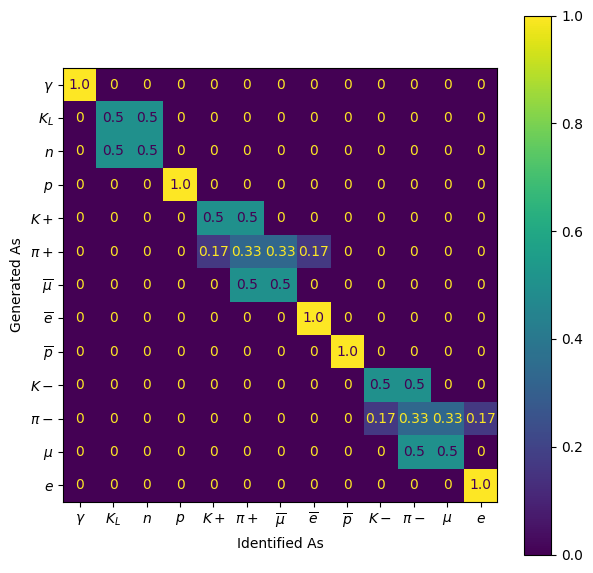

In [ ]:
# @title
generated_as = [["Photon","KLong","Neutron","Proton","K+","Pi+","AntiMuon","Positron","AntiProton","K-","Pi-","Muon","Electron","No ID"][i] for i in [0,1,1,2,2,3,4,4,5,5,5,5,5,5,6,6,7,8,9,9,10,10,10,10,10,10,11,11,12]]
identified_as = [["Photon","KLong","Neutron","Proton","K+","Pi+","AntiMuon","Positron","AntiProton","K-","Pi-","Muon","Electron","No ID"][i] for i in [0,1,2,2,1,3,4,5,5,5,4,6,6,7,5,6,7,8,9,10,9,10,10,11,11,12,10,11,12]]
confusion_matrix = ConfusionMatrix(generated_as,identified_as)

Double click to edit this cell and answer the following question: In this confusion matrix, what particle is the muon ($\mu-$) most often misclassified as?

#####**Solution:**

Looking at the $\mu-$ row of the confusion matrix, the muon is misidentified as a negative pion about $50\%$ of the time.

---
##**Creating Confusion Matrices**
---
In this section, we will see how to create a confusion matrix. To construct a confusion matrix, we need a collection of data for which we need **labeled dataset**. A labeled dataset is a dataset that contains data that will be used to predict something, along with the "correct" prediction. For example, the labeled datasets we will use contain the information we need to apply PID methods along with the particles along with the particles that produced that information. Labeled datasets provide the "solution" to the problem that we are trying to solve, which gives us a unique opportunity to see how accurate our PID methods are. In our case, the "Generated As" column of our dataset will serve as our **label** (our "solution"), and all of the other columns will be used by the PID methods we want to test.

In practice, we will have a so-called **estimator function** that implements our PID method. In other words, it takes in information like energy, momentum, ionization energy loss, time of flight, etc., and returns its guess of which particle is associated with that information. In previous notebooks, all of these functions have been called `identify_particle`. To create a confusion matrix based on a labeled dataset and an estimator function, we can use the `ConfusionMatrix.from_estimator` function. The syntax we want to use is:
```
ConfusionMatrix.from_estimator(estimator, dataset)
```
The `estimator` is the function we want to use for PID. The `dataset` is the data we want to test our PID method on. You can also optionally provide a title for the confusion matrix as follows:
```
ConfusionMatrix.from_estimator(estimator, dataset, title= "Your title here")
```

####**Question #5:**
---
A function called `identify_particle` is defined in the cell below. Use the `ConfusionMatrix.from_estimator` function to create a confusion matrix for our PID method based on the dataframe stored in the variable `neutral_particles`.

In [ ]:
def identify_particle(particle):
  return "Photon"

#Complete this code

#####**Solution:**

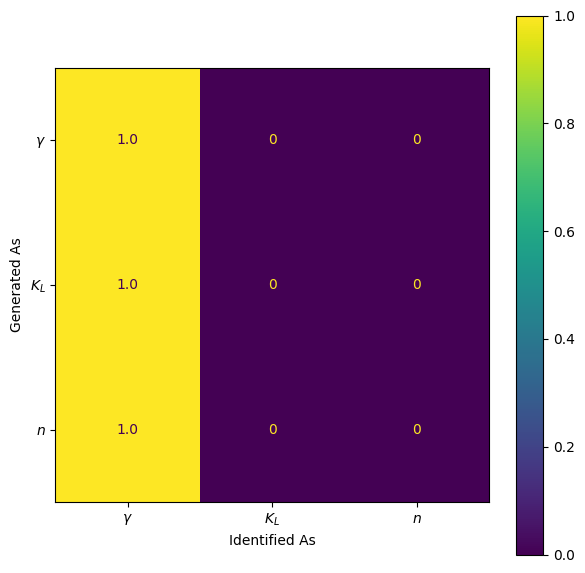

In [ ]:
def identify_particle(particle):
  return "Photon"

ConfusionMatrix.from_estimator(identify_particle, neutral_particles)

####**Question #6:**
---
The cell below defines another `identify_particle` function. Create a confusion matrix using the data stored in the `neutral_particles` dataframe. Is this PID method better or worse at identifying neutrons than the method in Question #5?

In [ ]:
def identify_particle(particle):
  if particle['E'] > 0.7:
    return "Photon"
  elif particle['E'] > 0.4:
    return "KLong"
  else:
    return "Neutron"

#Complete this code

#####**Solution:**

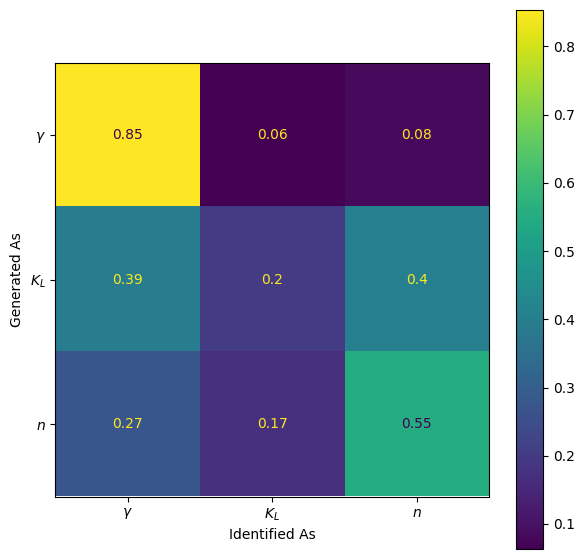

In [ ]:
def identify_particle(particle):
  if particle['E'] > 0.7:
    return "Photon"
  elif particle['E'] > 0.4:
    return "KLong"
  else:
    return "Neutron"

ConfusionMatrix.from_estimator(identify_particle, neutral_particles)

---
##**Interpreting Confusion Matrices**
---
In this section, we will practice identifying trends in confusion matrices and trying to explain them based on our understanding of how they were created.

####**Question #7:**
---
In the worst-case scenario, our PID method won't be able to distinguish between particles. Below are three examples of confusion matrices that are created from PID methods that are bad at distinguishing between particles. Which of the following confusion matrices represents the realistic "worst-case scenario" for a PID method?

**Hint:** No actual PID method will perform worse than a random guess between particles of the same charge.

Double click to edit this cell and answer the following question: Which of the following confusion matrices represents the realistic "worst-case scenario" for a PID method?

#####**Option A**

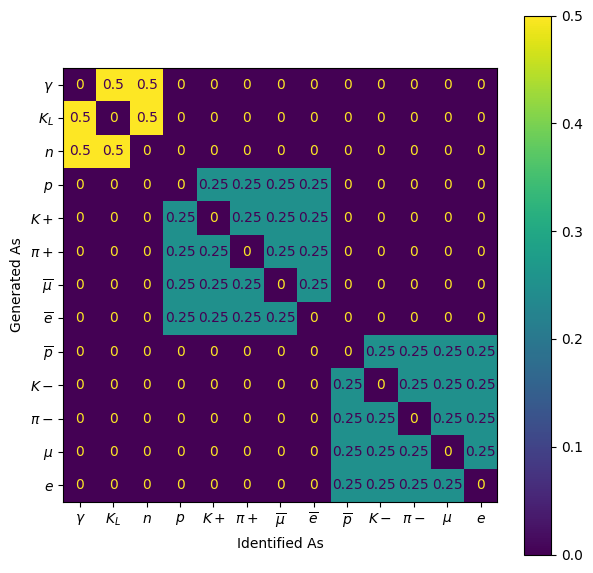

In [ ]:
# @title
generated_as = []
identified_as = []
particles = ["Photon","KLong","Neutron","Proton","K+","Pi+","AntiMuon","Positron","AntiProton","K-","Pi-","Muon","Electron","No ID"]
for i in range(3):
  generated_as.extend([particles[i] for j in range(2)])
  identified_as.extend([particles[j] for j in range(3) if j != i])
for i in range(3,8):
  generated_as.extend([particles[i] for j in range(4)])
  identified_as.extend([particles[j] for j in range(3,8) if j != i])
for i in range(8,13):
  generated_as.extend([particles[i] for j in range(4)])
  identified_as.extend([particles[j] for j in range(8,13) if j != i])
confusion_matrix = ConfusionMatrix(generated_as,identified_as)

#####**Option B**

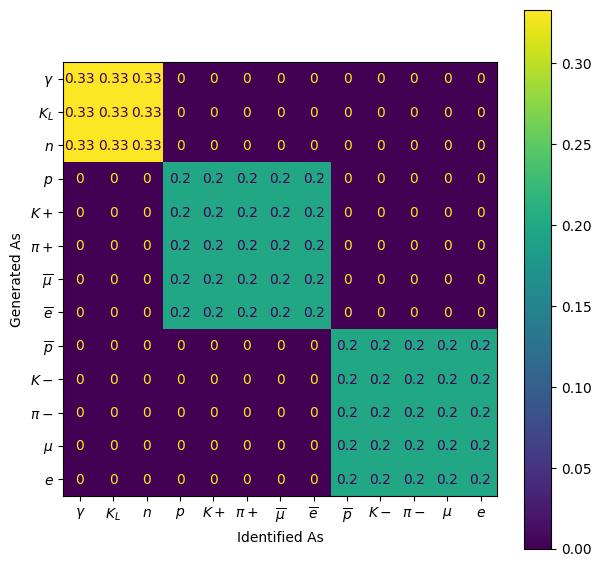

In [ ]:
# @title
generated_as = []
identified_as = []
particles = ["Photon","KLong","Neutron","Proton","K+","Pi+","AntiMuon","Positron","AntiProton","K-","Pi-","Muon","Electron","No ID"]
for i in range(3):
  generated_as.extend([particles[i] for j in range(3)])
  identified_as.extend([particles[j] for j in range(3)])
for i in range(3,8):
  generated_as.extend([particles[i] for j in range(5)])
  identified_as.extend([particles[j] for j in range(3,8)])
for i in range(8,13):
  generated_as.extend([particles[i] for j in range(5)])
  identified_as.extend([particles[j] for j in range(8,13)])
confusion_matrix = ConfusionMatrix(generated_as,identified_as)

#####**Option C**

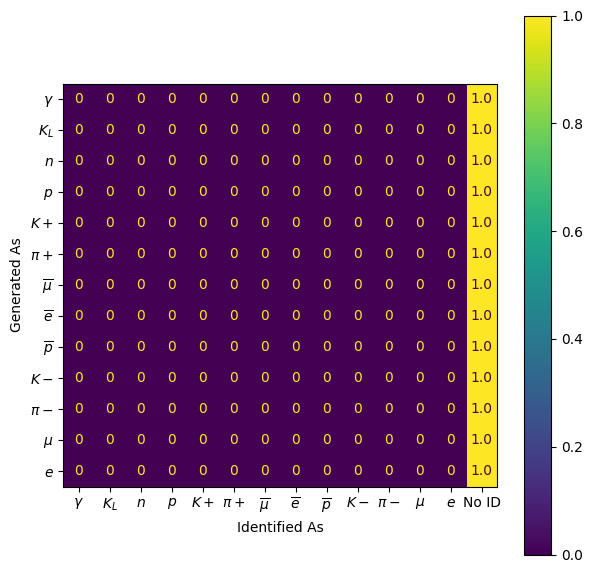

In [ ]:
# @title
particles = ["Photon","KLong","Neutron","Proton","K+","Pi+","AntiMuon","Positron","AntiProton","K-","Pi-","Muon","Electron","No ID"]
generated_as = [particles[i] for i in range(13)]
identified_as = [particles[13] for i in range(13)]
confusion_matrix = ConfusionMatrix(generated_as,identified_as)

#####**Option D**

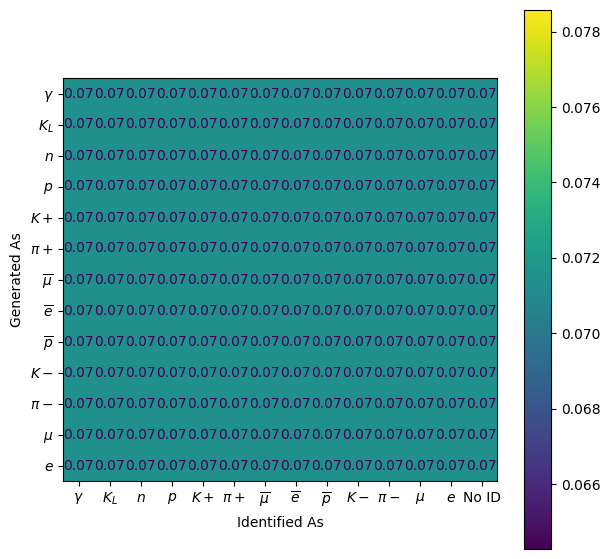

In [ ]:
# @title
generated_as = []
identified_as = []
particles = ["Photon","KLong","Neutron","Proton","K+","Pi+","AntiMuon","Positron","AntiProton","K-","Pi-","Muon","Electron","No ID"]
for i in range(13):
  generated_as.extend([particles[i] for j in range(14)])
  identified_as.extend([particles[j] for j in range(14)])
confusion_matrix = ConfusionMatrix(generated_as,identified_as)

#####**Solution:**

The correct answer is option B, which represents a random guess between particles with the same charge. For example, for generated photons (the top row of the confusion matrix), the PID method is equally likely to classify them as a photon, a KLong, and a neutron, all of which are neutral particles. The same holds for KLongs and neutrons, which are also classified as a neutral particle at random. Protons (and all other positive particles) are randomly classified as either a proton, positive kaon, positive pion, antimuon, or positron. Similarly, all negative particles are randomly classified as other negative particles. This confusion matrix represents the "worst" PID method, which is randomly guessing a particle based on its charge.

Option A takes this a bit too far, which makes it not realistic. This PID method also randomly classifies a particle as a particle of the same change, but it excludes the right answer! This PID method is trying too hard to be wrong- how would it know to avoid the right answer if it didn't know what the right answer was? If you see a confusion matrix like this, it's more than likely that you coded your estimator function wrong.

Option C is just a useless PID method. It says "I don't know" to every single particle, which is what the "No ID" column says. The "No ID" column is usually filled with particles that we don't have enough information to apply our PID method to, or with particles whose information is so abnormal that it doesn't make sense for it to be any of the particles we are classifying. If you see a confusion matrix like this, it is possible that you are looking at the wrong dataset (since the dataset doesn't have the right information to perform the PID method), or that your estimator function isn't actually classifying anything.

Option D is also a random guess, but it is a random guess that doesn't take the charge of the particle into consideration. In practice, we always have information about the charge of a particle based on whether or not the particle left a track, as well as the way the track curved (if it exists). Therefore, this confusion matrix doesn't make sense, because it mixes up positive particles, negative particles, and neutral particles, which never happens in practice.

####**Question #8:**
---
Below, we have a full-sized confusion matrix with all 13 particles that are commonly seen in particle physics experiments. Are there any particles in the confusion matrix below that the PID method is not able to tell apart? In other words, is the PID method "guessing" for any particles?

Double click to edit this cell and answer the following question: Are there any particles in the confusion matrix below that the PID method is not able to tell apart? In other words, is the PID method "guessing" for any particles?

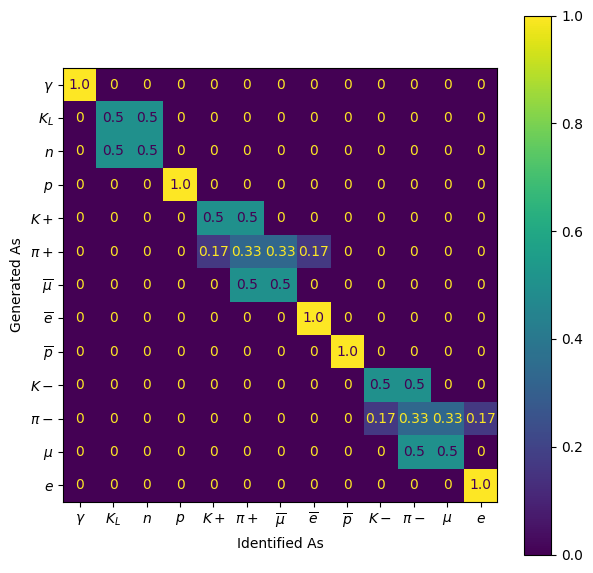

In [ ]:
# @title
generated_as = [["Photon","KLong","Neutron","Proton","K+","Pi+","AntiMuon","Positron","AntiProton","K-","Pi-","Muon","Electron","No ID"][i] for i in [0,1,1,2,2,3,4,4,5,5,5,5,5,5,6,6,7,8,9,9,10,10,10,10,10,10,11,11,12]]
identified_as = [["Photon","KLong","Neutron","Proton","K+","Pi+","AntiMuon","Positron","AntiProton","K-","Pi-","Muon","Electron","No ID"][i] for i in [0,1,2,2,1,3,4,5,5,5,4,6,6,7,5,6,7,8,9,10,9,10,10,11,11,12,10,11,12]]
confusion_matrix = ConfusionMatrix(generated_as,identified_as)

#####**Solution:**

The PID method is unable to distinguish between several particles. For example, this PID method is unable to distinguish between KLongs and neutrons. If the generated particle is a KLong, the PID method randomly guesses between a KLong and a neutron. If the generated particle is a neutron, then the PID method randomly guesses between a KLong and a neutron. The PID method is unable to distinguish between them.

The same can be said for kaons and pions, or for pions and muons, though the "guessing" is slightly different for each particle. For example, if the generated particle is a kaon, then the PID method guesses between a kaon and a pion. However, if the generated particle is a pion, then the PID method guesses between a kaon, a pion, a muon, and an electron, though it is more likely to guess a pion or a muon than a kaon or an electron.

####**Question #9:**
---
Suppose we want an extremely pure sample of protons. In other words, we want to create a dataset in which every particle we identify as a proton is actually a proton. In this case, we don't really care about the accuracies of the other particles, nor do we care about if we identify some protons as other particles. Which of the following confusion matrices achieves the goal of having an extremely pure sample of protons?

Double click to edit this cell and answer the following question: Which of the following confusion matrices achieves the goal of having an extremely pure sample of protons?

#####**Option A**

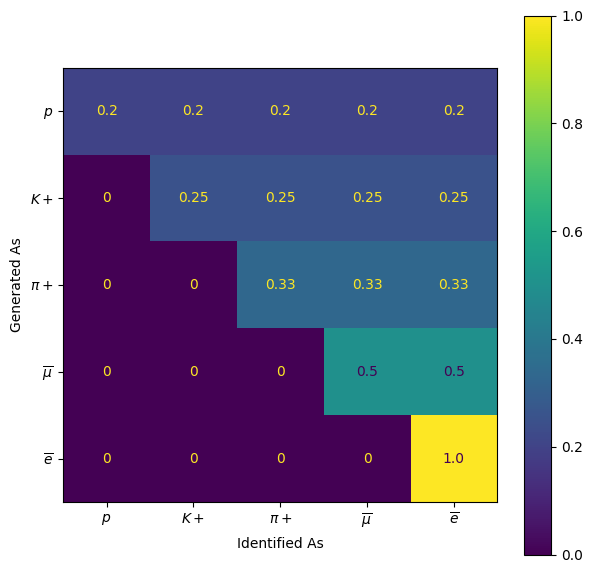

In [ ]:
# @title
generated_as = []
identified_as = []
particles = ["Photon","KLong","Neutron","Proton","K+","Pi+","AntiMuon","Positron","AntiProton","K-","Pi-","Muon","Electron","No ID"]
for i in range(3,8):
  generated_as.extend([particles[i] for j in range(8-i)])
  identified_as.extend([particles[j] for j in range(3,8) if j >= i])
confusion_matrix = ConfusionMatrix(generated_as,identified_as)

#####**Option B**

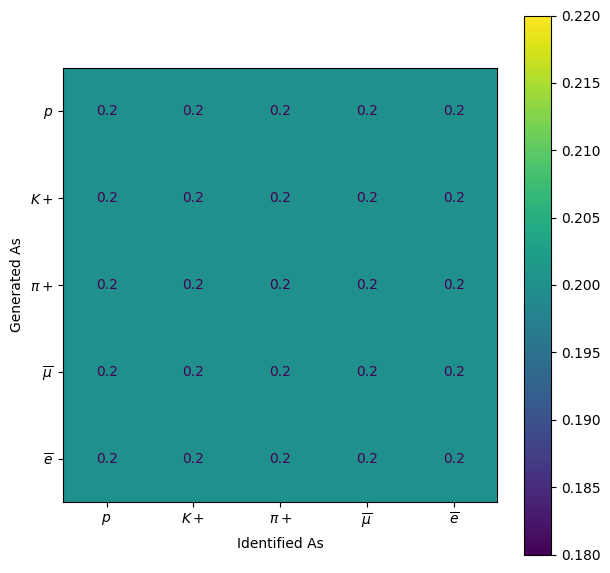

In [ ]:
# @title
generated_as = []
identified_as = []
particles = ["Photon","KLong","Neutron","Proton","K+","Pi+","AntiMuon","Positron","AntiProton","K-","Pi-","Muon","Electron","No ID"]
for i in range(3,8):
  generated_as.extend([particles[i] for j in range(5)])
  identified_as.extend([particles[j] for j in range(3,8)])
confusion_matrix = ConfusionMatrix(generated_as,identified_as)

#####**Option C**

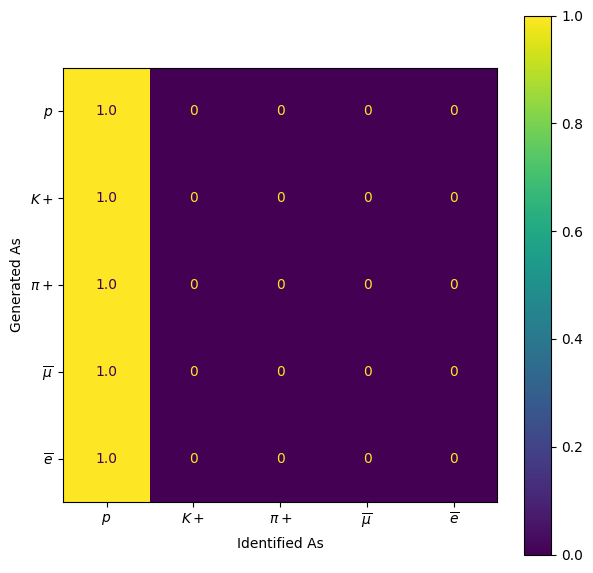

In [ ]:
# @title
particles = ["Photon","KLong","Neutron","Proton","K+","Pi+","AntiMuon","Positron","AntiProton","K-","Pi-","Muon","Electron","No ID"]
generated_as = [particles[i] for i in range(3,8)]
identified_as = [particles[3] for i in range(3,8)]
confusion_matrix = ConfusionMatrix(generated_as,identified_as)

#####**Option D**

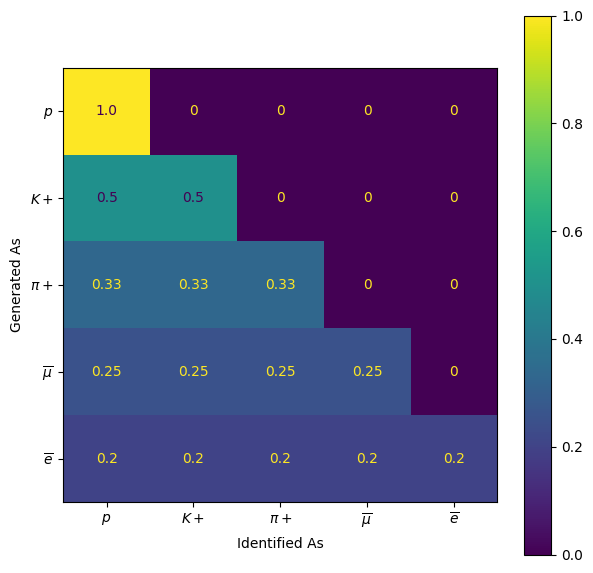

In [ ]:
# @title
generated_as = []
identified_as = []
particles = ["Photon","KLong","Neutron","Proton","K+","Pi+","AntiMuon","Positron","AntiProton","K-","Pi-","Muon","Electron","No ID"]
for i in range(3,8):
  generated_as.extend([particles[i] for j in range(i-2)])
  identified_as.extend([particles[j] for j in range(3,8) if j <= i])
confusion_matrix = ConfusionMatrix(generated_as,identified_as)

#####**Solution:**

The correct answer is option A. To look at accuracy, we tend to look across rows. However, to look at purity, we look down columns. Purity asks the question: If a particle is identified as a proton, how likely is it to actually be a proton? For option A, the first column represents all of the particles we identified as protons. Notice how the only number in that column is in the "Generated As Proton" row. This means that if a particle was identified as a proton, it must have been generated as a proton.

In options B, C, and D, notice that there are particles that were identified as protons, but were not generated as protons. This will hurt the purity of the proton sample, so if purity is our goal, then the accuracy doesn't matter as much as the other numbers in the "Identified as proton" column.

Note that even though the accuracy of option A is much lower than the accuracies of the other options, it still creates the purest sample. The accuracy still matters here, though in a different sense. Since only 20% of particles generated as protons are identified as protons, most of the protons we want to study are not included in our sample. However, if we increased the accuracy to 100%, all of the generated protons would be included in our sample. In particle physics, we usually get around needing high accuracy by increasing the number of events (which would increase the number of generated protons), so that we can get a large sample of protons without needing to sacrifice purity.

####**Question #10:**
---
Muons are much less common than pions in the types of interactions studied by the GlueX experiment. Suppose a specific PID method was used to create the confusion matrix shown below. Based on the confusion matrix and the fact that muons are far more rare than pions, which sample created by this PID method is more pure: the muon sample or the pion sample?

Double click to edit this cell and answer the following question: Based on the confusion matrix and the fact that muons are far more rare than pions, which sample created by this PID method is more pure: the muon sample or the pion sample?

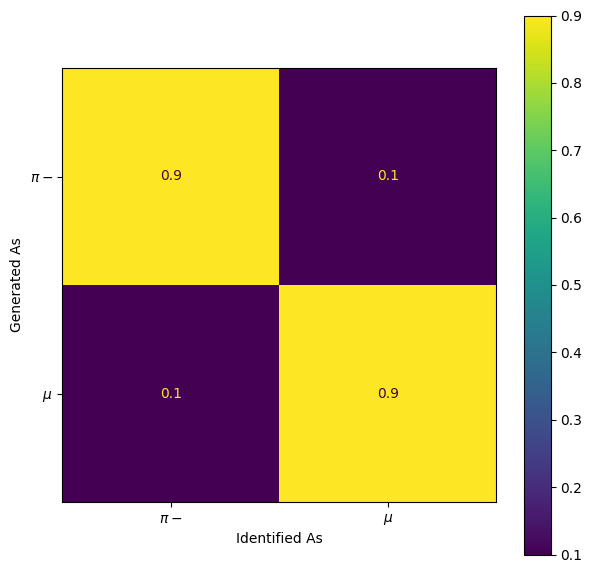

In [ ]:
# @title
generated_as = []
identified_as = []
particles = ["Photon","KLong","Neutron","Proton","K+","Pi+","AntiMuon","Positron","AntiProton","K-","Pi-","Muon","Electron","No ID"]
generated_as.extend(["Pi-" for j in range(100)])
identified_as.extend(["Muon" for j in range(100)])

generated_as.append("Muon")
identified_as.append("Pi-")

generated_as.extend(["Pi-" for j in range(900)])
identified_as.extend(["Pi-" for j in range(900)])

generated_as.extend(["Muon" for j in range(9)])
identified_as.extend(["Muon" for j in range(9)])
confusion_matrix = ConfusionMatrix(generated_as,identified_as)

#####**Solution:**

Based on this confusion matrix, the pion sample will be more pure. Let's think of an exaggerated case- let's say we generate 1000 pions and 10 muons. If 90% of generated pions are identified as pions, then we have 900 pions in our "identified as pions" sample. However, 10% of muons are identified as pions as well. 10% of the 10 muons is 1 muon, so there are 900 pions and 1 muon in the "identified as pions" sample.

Now let's think about the muons sample. 90% of muons are identified as muons, so there are 9 muons in the "identified as muon" sample. However, 10% of pions are identified as muons, so there are 100 pions in the "identified as muon" sample. The "identified as muon" sample has more pions than muons, which means it is not even close to being pure.

This is counterintuitive, but it is a real problem that we need to remember when looking at a confusion matrix! However, we can slightly modify our confusion matrix to convey purity. Remember how in a normal confusion matrix, every row adds up to 1, since there is a 100% chance that a generated particle is identified as something. However, if we change our calculations, we can make the columns of the confusion matrix add up to 1 instead. When we do it this way, the numbers of the confusion matrix represent something slightly different. Instead of accuracies, they represent purities. In other words, the numbers represent how much of the identified sample is comprised of that particle. For example, in the confusion matrix below, the 1 in the top right says that (about) 100% of the particles in the "identified as pion" category were actually pions. The zero below it represents that (approximately) 0% of the particles in the "identified as pion" category were muons.

In the next column, we see that 92% of particles identified as muons were actually pions, so our sample is only 8% muons.

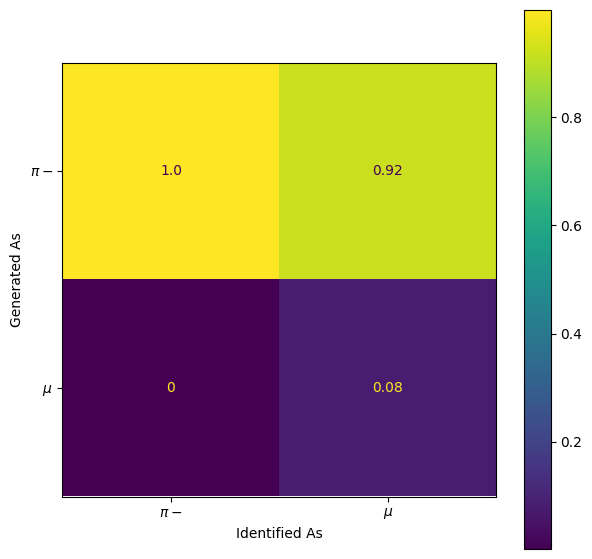

In [ ]:
# @title
generated_as = []
identified_as = []
particles = ["Photon","KLong","Neutron","Proton","K+","Pi+","AntiMuon","Positron","AntiProton","K-","Pi-","Muon","Electron","No ID"]
generated_as.extend(["Pi-" for j in range(100)])
identified_as.extend(["Muon" for j in range(100)])

generated_as.append("Muon")
identified_as.append("Pi-")

generated_as.extend(["Pi-" for j in range(900)])
identified_as.extend(["Pi-" for j in range(900)])

generated_as.extend(["Muon" for j in range(9)])
identified_as.extend(["Muon" for j in range(9)])
confusion_matrix = ConfusionMatrix(generated_as,identified_as, purity= True)

To modify the confusion matrix to represent purity instead of accuracy, use the `purity` argument of the ConfusionMatrix function. For example:
```
ConfusionMatrix.from_estimator(identify_particle, particle_data, purity= True)
```